In [9]:
from spineq.data.census import PopulationDataset, WorkplaceDataset
from spineq.data.group import LocalAuthority
from spineq.mappings import lad20nm_to_lad20cd
from spineq.opt.coverage import ExponentialCoverage
from spineq.opt.greedy import Greedy
from spineq.opt.objectives import Column, CombinedObjectives, Objectives
from spineq.plot.plotting import plot_optimisation_result

In [3]:
lad20nm = "Newcastle upon Tyne"
lad20cd = lad20nm_to_lad20cd(lad20nm)

n_sensors = 20
theta = 500

child_age = 16
elder_age = 65

pop_total_weight = 0
pop_child_weight = 0
pop_elder_weight = 0
work_weight = 1

title = "Workplace Network"

In [11]:
total = PopulationDataset(lad20cd).to_total()
child = (
    PopulationDataset(lad20cd).filter_age(high=child_age, name="children").to_total()
)
elder = PopulationDataset(lad20cd).filter_age(low=elder_age, name="elderly").to_total()
work = WorkplaceDataset(lad20cd)
la = LocalAuthority(lad20cd, datasets=[total, child, elder, work])

cov = ExponentialCoverage.from_la(la, theta)

opt_objs = CombinedObjectives(
    la,
    [
        Column(total.name, "total", pop_total_weight),
        Column(child.name, "total", pop_child_weight),
        Column(elder.name, "total", pop_elder_weight),
        Column(work.name, "workers", work_weight),
    ],
    cov,
)

all_objs = Objectives(
    la,
    [
        Column(total.name, "total"),
        Column(child.name, "total"),
        Column(elder.name, "total"),
        Column(work.name, "workers"),
    ],
    cov,
)

In [6]:
greedy = Greedy()
result = greedy.run(opt_objs, n_sensors)

Placing sensor 1 out of 20 ... coverage = 0.16
Placing sensor 2 out of 20 ... coverage = 0.22
Placing sensor 3 out of 20 ... coverage = 0.27
Placing sensor 4 out of 20 ... coverage = 0.31
Placing sensor 5 out of 20 ... coverage = 0.35
Placing sensor 6 out of 20 ... coverage = 0.38
Placing sensor 7 out of 20 ... coverage = 0.41
Placing sensor 8 out of 20 ... coverage = 0.43
Placing sensor 9 out of 20 ... coverage = 0.45
Placing sensor 10 out of 20 ... coverage = 0.47
Placing sensor 11 out of 20 ... coverage = 0.48
Placing sensor 12 out of 20 ... coverage = 0.50
Placing sensor 13 out of 20 ... coverage = 0.51
Placing sensor 14 out of 20 ... coverage = 0.52
Placing sensor 15 out of 20 ... coverage = 0.53
Placing sensor 16 out of 20 ... coverage = 0.55
Placing sensor 17 out of 20 ... coverage = 0.56
Placing sensor 18 out of 20 ... coverage = 0.57
Placing sensor 19 out of 20 ... coverage = 0.58
Placing sensor 20 out of 20 ... coverage = 0.59


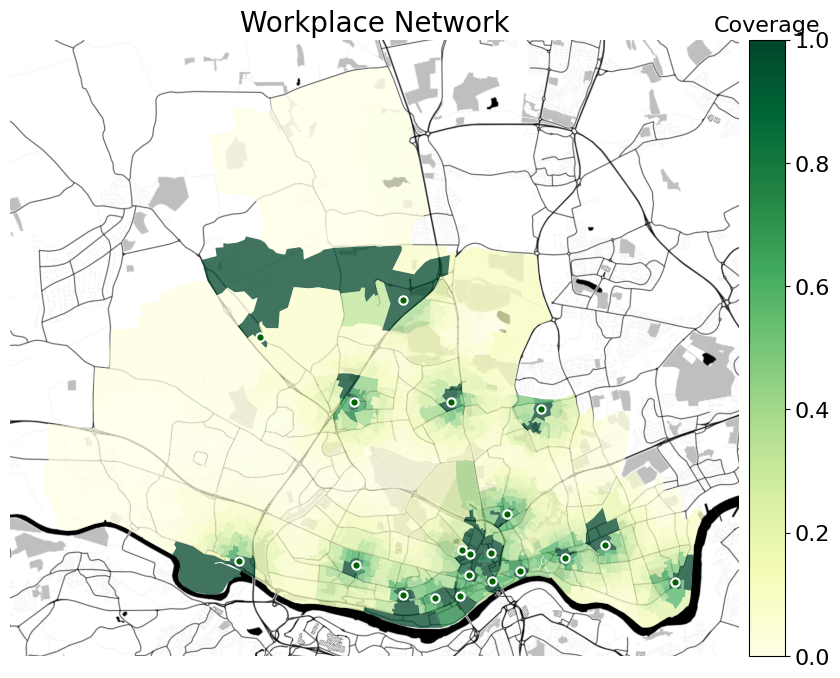

In [7]:
plot_optimisation_result(result, title=title)

In [16]:
cov_all_objs = all_objs.fitness(result.sensors)
for obj, fit in zip(all_objs.objectives, cov_all_objs):
    print(f"{obj.label}: {fit:.2f}")


population_total: 0.23
children_total: 0.21
elderly_total: 0.17
workplace_workers: 0.59
